<h1>Fraud is bad. Don't commit no fraud</h1>



1.   Data Import
2.   Exploratory Data Analysis






# Data Import

In [1]:
# importing all the python libraries we will use
import pathlib
import matplotlib.pyplot as plt
#from google.colab import drive
import pandas as pd
import seaborn as sns
import numpy as np

df_fraud = pd.read_csv('fraud_oracle.csv')
df_fraud_backup = df_fraud.copy()

### Exploratory Data Analysis ###


* Number of variables
* Data types
* Class distribution of the variables
* Data quality check
* Feature engineering





In [2]:
# size of the dataset
df_fraud.shape

(15420, 33)

In [3]:
# first look at the data
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [4]:
# variable type breakdown and count
df_fraud.dtypes.value_counts()

object    24
int64      9
Name: count, dtype: int64

In [5]:
# we have 33 variables: 24 categorical and 9 numerical

# list of categorical variables
df_fraud.columns[df_fraud.dtypes == 'object']

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

In [6]:
# list of numerical variables
df_fraud.columns[df_fraud.dtypes == 'int64']

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year'],
      dtype='object')

In [7]:
# Now, let's take a look at the target variable, FraudFound_P
# Lets see the breakdown of classes for FraudFound_P

fraud_cases = pd.DataFrame(df_fraud['FraudFound_P'].value_counts())
fraud_cases['Percentage'] = round(df_fraud['FraudFound_P'].value_counts(normalize=True) * 100, 2)
fraud_cases = fraud_cases.rename(columns={'FraudFound_P': 'Claims'})
fraud_cases

count  Percentage
FraudFound_P                   
0             14497       94.01
1               923        5.99

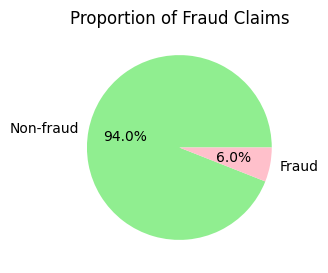

In [8]:
# Lets make a pie chart to vizualize this imbalance:

import matplotlib.pyplot as plt

# Proportion of fraud claims
fig, ax = plt.subplots(figsize=(4, 3))
fraud_proportion = df_fraud['FraudFound_P'].value_counts(normalize=True)
fraud_proportion.plot.pie(labels=['Non-fraud', 'Fraud'], autopct='%1.1f%%', ax=ax, colors=['lightgreen', 'pink'])  # Specify the axis using ax=ax

# Remove y-axis label
ax.set_ylabel('')

plt.title('Proportion of Fraud Claims')
plt.show()

## Overview of the variables

#### Number of variables

In total, there are 33 variables:
- 32 input variables
- 1 Output Variable

#### Data Types

- Numeric (int64) - 9
- Binary (Object) - 24

#### Target Variable
-  `FraudFound_P`
- Numeric
- Binary (0/1)
- Class Distribution: imbalanced (6% Fraud vs 94% Non-fraud)

**IMPORTANT:** The dataset is imbalanced. There are 5.99% fraud cases vs 94.01% non-fraud ones. In absolute numbers, we have 923 fraud cases vs 14,497 non-fraud cases. To deal with the imbalance, we will try some balancing technique:  'oversampling' of the minority class (fraud) or 'undersampling' of the majority class (no fraud) or both at the same time

In [9]:
# As seen above, only the Age variable appears to be a true numeric variable. All others can  be converted into object/categorical variables.
# Let's take a closer look at Age variable

In [10]:
df_fraud['Age'].describe()

count    15420.000000
mean        39.855707
std         13.492377
min          0.000000
25%         31.000000
50%         38.000000
75%         48.000000
max         80.000000
Name: Age, dtype: float64

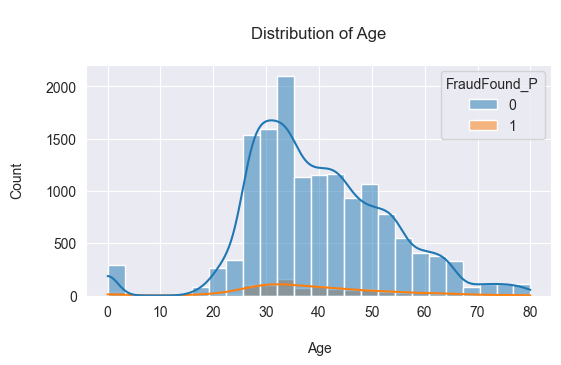

In [11]:
# The minimum value of A is 0 which does not seem correct so lets take a closer look at it and see its distribution

# Plot the distribution:
plt.figure(figsize=(6, 3))
sns.set_style('darkgrid')
sns.histplot(data=df_fraud, x='Age', color='teal', kde=True, bins=25, hue='FraudFound_P')
plt.title('\nDistribution of Age\n')
plt.xlabel('\nAge')
plt.ylabel('Count\n')
plt.show()

In [12]:
# So how many data points are there with Age == 0
df_fraud[df_fraud['Age'] == 0][['Age', 'FraudFound_P']].value_counts()


Age  FraudFound_P
0    0               289
     1                31
Name: count, dtype: int64

In [13]:
# We have a total of 320 cases where Age = 0. 31 of them are Fraud vases vs 289 non-Fraud cases.
# Need to replace Age values that are currently 0. First replace them with NaN, than impute with median for Age for FraudFound_P == 0:

df_fraud['Age'] = df_fraud['Age'].replace(0, float('nan'))

# Calculate the median of 'Age' for non-fraudulent cases
median_age_non_fraud = df_fraud[df_fraud['FraudFound_P'] == 0]['Age'].median()

# Fill NaN values in 'Age' with the calculated median
df_fraud['Age'].fillna(median_age_non_fraud, inplace=True)


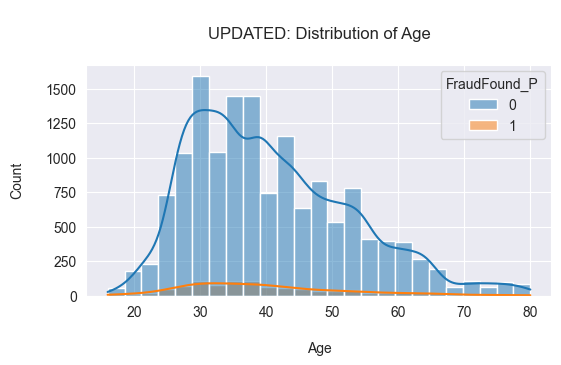

In [14]:
# Replot the distribution:
plt.figure(figsize=(6, 3))
sns.set_style('darkgrid')
sns.histplot(data=df_fraud, x='Age', color='teal', kde=True, bins=25, hue='FraudFound_P')
plt.title('\nUPDATED: Distribution of Age\n')
plt.xlabel('\nAge')
plt.ylabel('Count\n')
plt.show()

In [15]:
# recoding Age into Age_Bracket. We will assume AgeOfPolicyHolder is a different variable
bins = [16, 18, 21, 26, 31, 36, 41, 51, 66, 100]
labels = ['16 to 17', '18 to 20', '21 to 25', '26 to 30', '31 to 35', '36 to 40', '41 to 50', '51 to 65', 'over 65']

df_fraud['Age_Bracket'] = pd.cut(df_fraud['Age'], bins=bins, labels=labels, right=False)
df_fraud['Age_Bracket'] = df_fraud['Age_Bracket'].astype('object')


In [16]:
df_fraud[['Age', 'AgeOfPolicyHolder', 'Age_Bracket']].head(10)

Age AgeOfPolicyHolder Age_Bracket
0  21.0          26 to 30    21 to 25
1  34.0          31 to 35    31 to 35
2  47.0          41 to 50    41 to 50
3  65.0          51 to 65    51 to 65
4  27.0          31 to 35    26 to 30
5  20.0          21 to 25    18 to 20
6  36.0          36 to 40    36 to 40
7  39.0          16 to 17    36 to 40
8  30.0          31 to 35    26 to 30
9  42.0          36 to 40    41 to 50

In [17]:
# exploring similar columns ['BasePolicy','PolicyType', 'VehicleCategory']

df_fraud[df_fraud['VehicleCategory'] == 'Sport'][['VehicleCategory', 'BasePolicy', 'PolicyType']]



VehicleCategory BasePolicy         PolicyType
0               Sport  Liability  Sport - Liability
1               Sport  Collision  Sport - Collision
2               Sport  Collision  Sport - Collision
3               Sport  Liability  Sedan - Liability
4               Sport  Collision  Sport - Collision
...               ...        ...                ...
15402           Sport  Liability  Sedan - Liability
15407           Sport  Liability  Sedan - Liability
15412           Sport  Liability  Sedan - Liability
15413           Sport  Liability  Sedan - Liability
15416           Sport  Liability  Sedan - Liability

[5358 rows x 3 columns]

In [18]:
# creating a new variable that is a combo of VehicleCategory' and 'BasePolicy'
# we are assuming its actually different from 'PolicyType' so we are keeping that one too

df_fraud['VehicleCategory_BasePolicy'] = df_fraud['VehicleCategory'] + ' - ' + df_fraud['BasePolicy']

In [19]:
# dropping  irrelevant columns
df_fraud = df_fraud.drop(['PolicyNumber'], axis = 1)
 #'DayOfWeekClaimed', 'MonthClaimed', 'Year', 'AgeOfPolicyHolder', 'Month', 'WeekOfMonth', 'WeekOfMonthClaimed',


In [20]:
df_fraud.head()

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  \
0          Jan                   1  Female        Single  ...   
1          Jan                   4    Male        Single  ...   
2          Nov                   2    Male       Married  ...   
3          Jul                   1    Male       Married  ...   
4          Feb                   2  Female        Single  ...   

   PoliceReportFiled WitnessPresent AgentType NumberOfSuppliments  \
0                 No             No  External                none   
1                Yes             No  External                none   
2                 No             No  External                none   
3                Yes             No  External         more than 5   
4                 No             No  External                none   

  AddressChange_Claim  NumberOfCars  Year  BasePolicy  Age_Bracket  \
0              1 year        3 to 4  1994   Liability     21 to 25   
1           no change     1 vehicle  1994   Collision     31 to 35   
2           no change     1 vehicle  1994   Collision     41 to 50   
3           no change     1 vehicle  1994   Liability     51 to 65   
4           no change     1 vehicle  1994   Collision     26 to 30   

  VehicleCategory_BasePolicy  
0          Sport - Liability  
1          Sport - Collision  
2          Sport - Collision  
3          Sport - Liability  
4          Sport - Collision  

[5 rows x 34 columns]

In [21]:
# converting numerical to categorical varialbes. Leaving FraudFound_P as is.
df_fraud[['Deductible', 'DriverRating', 'WeekOfMonth', 'WeekOfMonthClaimed', 'Year', 'RepNumber']] = \
df_fraud[['Deductible', 'DriverRating', 'WeekOfMonth', 'WeekOfMonthClaimed', 'Year', 'RepNumber']].astype(str)


In [22]:
df_fraud.select_dtypes(include='int64').head(5)

FraudFound_P
0             0
1             0
2             0
3             0
4             0

In [23]:
df_fraud.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'RepNumber', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'Age_Bracket', 'VehicleCategory_BasePolicy'],
      dtype='object')

Month  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
  Mar             1    102                 7.50                            11.05
  Aug             1     84                 7.45                             9.10
  May             1     94                 6.88                            10.18
  Feb             1     82                 6.48                             8.88
  Apr             1     80                 6.25                             8.67
  Jan             1     87                 6.17                             9.43
  Sep             1     76                 6.13                             8.23
  Jun             1     80                 6.06                             8.67
  Oct             1     70                 5.36                             7.58
  Dec             1     62                 4.82                             6.72
  Jul             1     60                 4.77                             6.50
  Nov             1     46  

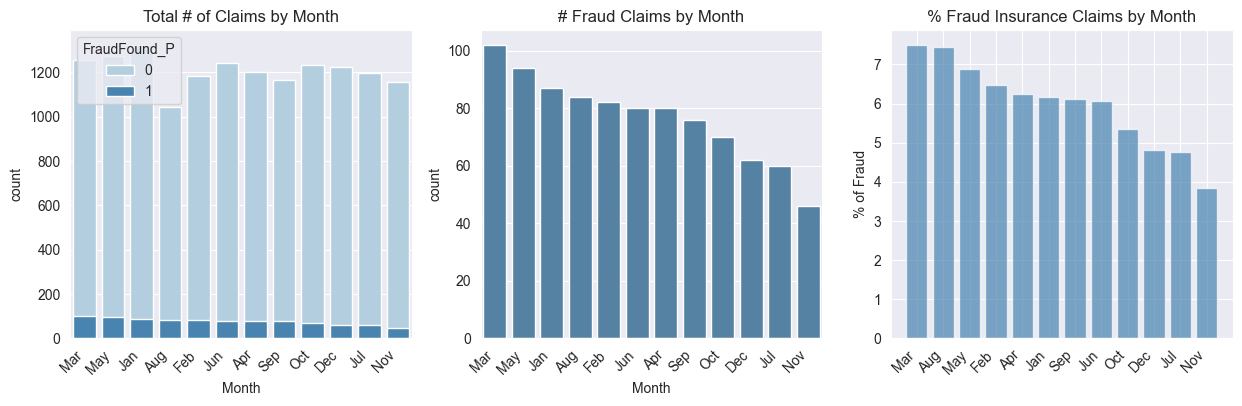

WeekOfMonth  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
          2             1    225                 6.32                            24.38
          1             1    200                 6.28                            21.67
          3             1    215                 5.91                            23.29
          4             1    192                 5.65                            20.80
          5             1     91                 5.56                             9.86
          5             0   1546                94.44                              NaN
          4             0   3206                94.35                              NaN
          3             0   3425                94.09                              NaN
          1             0   2987                93.72                              NaN
          2             0   3333                93.68                              NaN


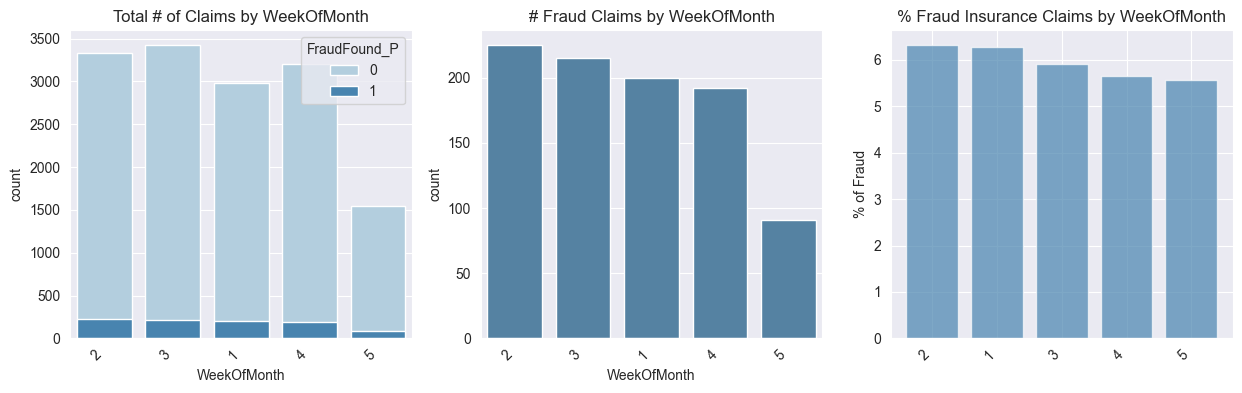

DayOfWeek  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
   Sunday             1    122                 6.99                            13.22
 Saturday             1    132                 6.66                            14.30
   Friday             1    154                 6.30                            16.68
   Monday             1    160                 6.12                            17.33
 Thursday             1    120                 5.52                            13.00
Wednesday             1    115                 5.33                            12.46
  Tuesday             1    120                 5.22                            13.00
  Tuesday             0   2180                94.78                              NaN
Wednesday             0   2044                94.67                              NaN
 Thursday             0   2053                94.48                              NaN
   Monday             0   2456                93.88              

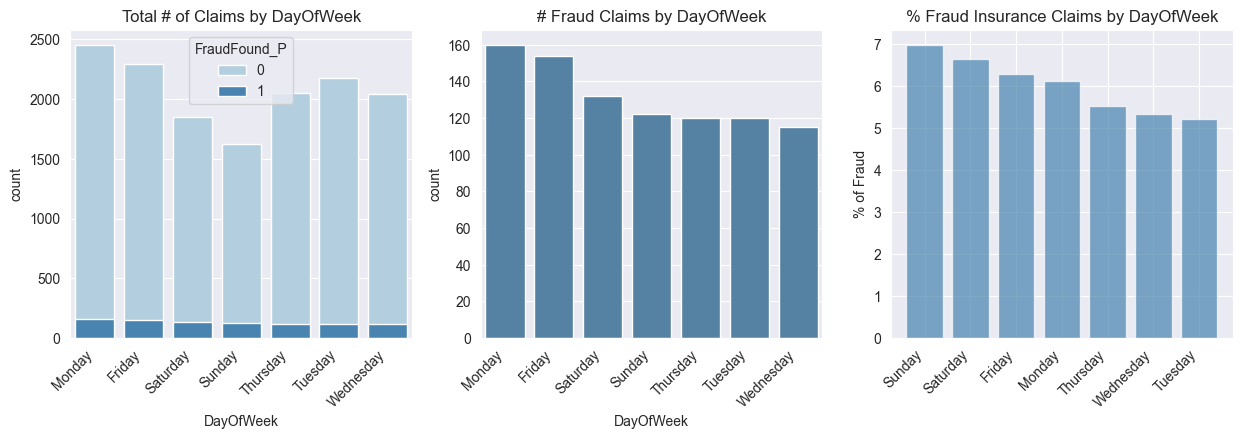

     Make  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
  Mecedes             1      1                25.00                             0.11
   Accura             1     59                12.50                             6.39
   Saturn             1      6                10.34                             0.65
     Saab             1     11                10.19                             1.19
     Ford             1     33                 7.33                             3.58
  Mercury             1      6                 7.23                             0.65
      BMW             1      1                 6.67                             0.11
    Honda             1    179                 6.39                            19.39
   Toyota             1    186                 5.96                            20.15
Chevrolet             1     94                 5.59                            10.18
  Pontiac             1    213                 5.55              

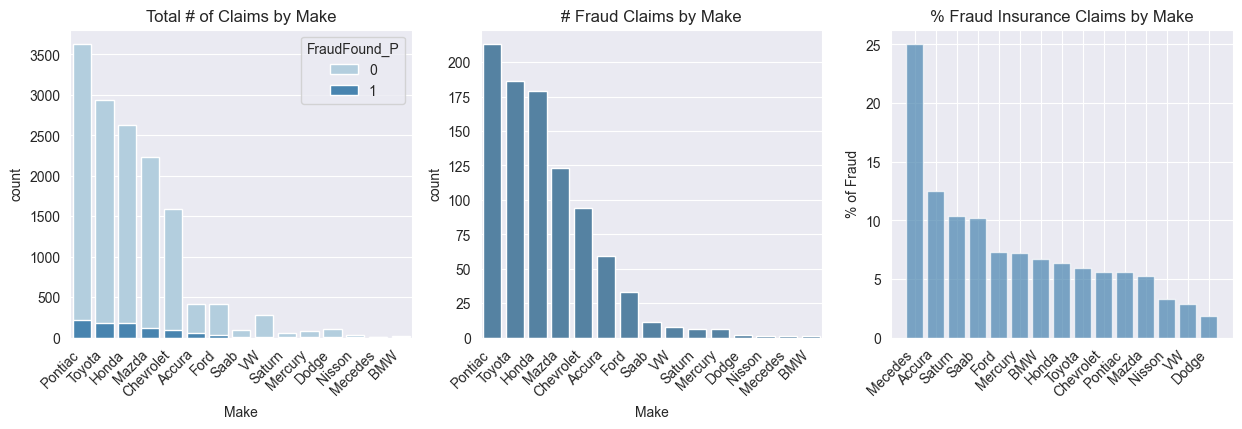

AccidentArea  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
       Rural             1    133                 8.32                            14.41
       Urban             1    790                 5.72                            85.59
       Urban             0  13032                94.28                              NaN
       Rural             0   1465                91.68                              NaN


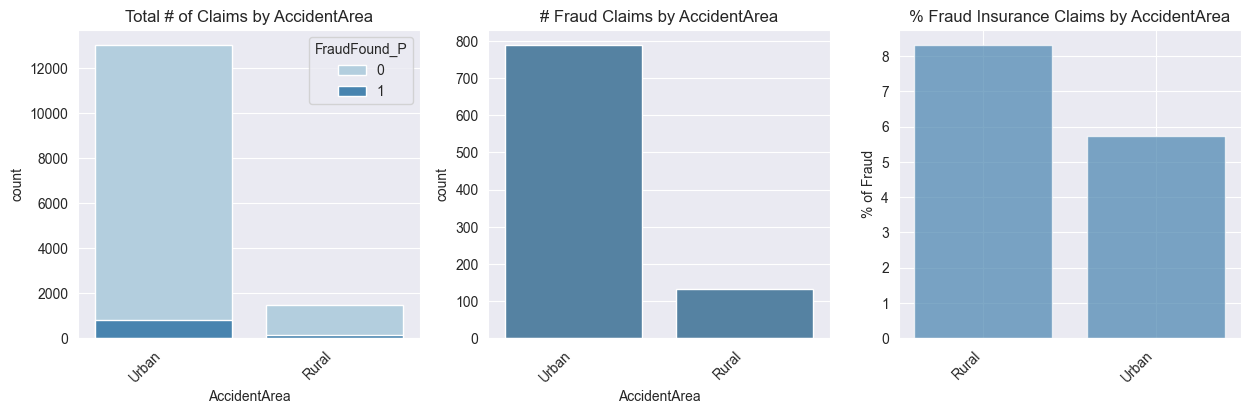

DayOfWeekClaimed  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
        Saturday             1     10                 7.87                             1.08
          Friday             1    164                 6.57                            17.77
       Wednesday             1    188                 6.37                            20.37
         Tuesday             1    198                 5.87                            21.45
          Sunday             1      3                 5.77                             0.33
          Monday             1    216                 5.75                            23.40
        Thursday             1    144                 5.41                            15.60
               0             0      1               100.00                              NaN
        Thursday             0   2516                94.59                              NaN
          Monday             0   3541                94.25                      

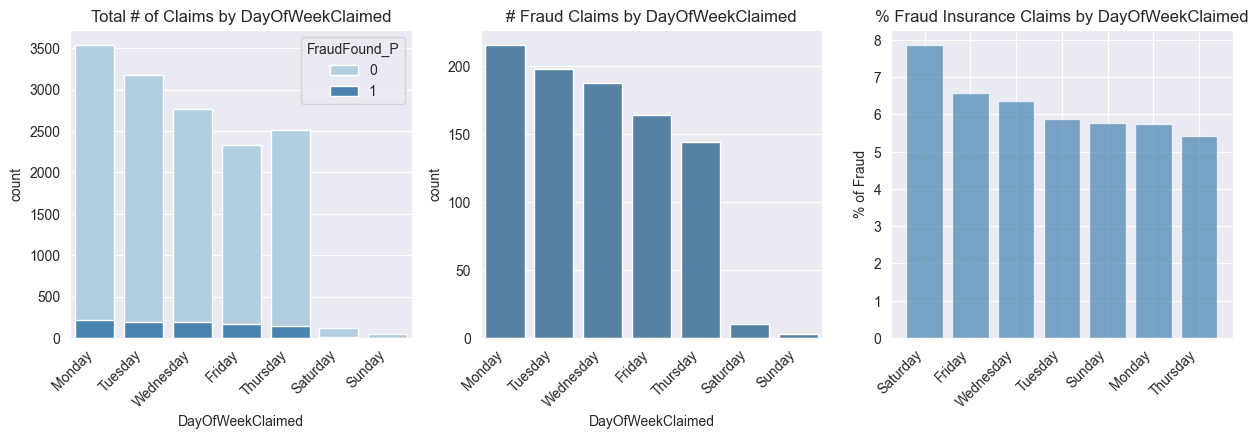

MonthClaimed  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
         Aug             1     92                 8.17                             9.97
         May             1    102                 7.23                            11.05
         Mar             1     97                 7.20                            10.51
         Apr             1     82                 6.45                             8.88
         Jan             1     92                 6.36                             9.97
         Sep             1     78                 6.28                             8.45
         Feb             1     78                 6.06                             8.45
         Jun             1     78                 6.03                             8.45
         Oct             1     73                 5.45                             7.91
         Jul             1     56                 4.57                             6.07
         Dec             1     4

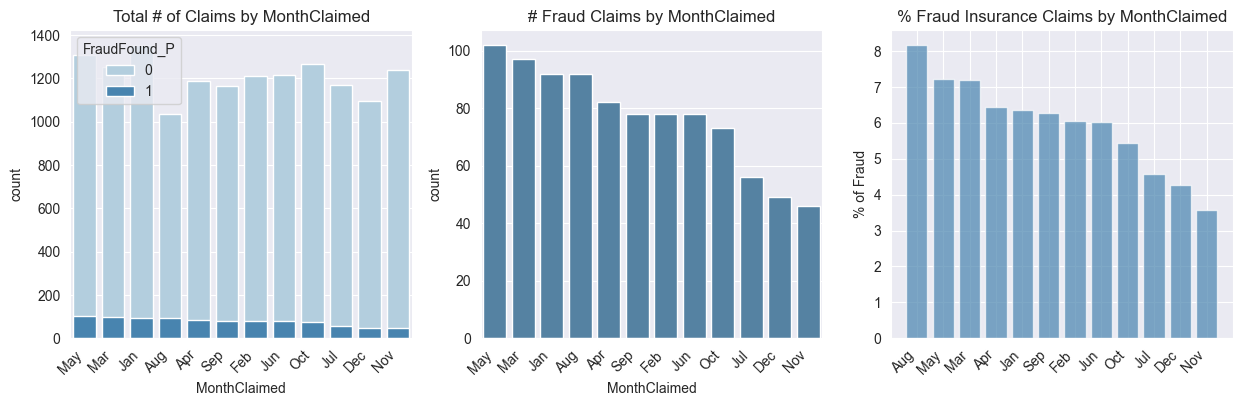

WeekOfMonthClaimed  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
                 1             1    220                 6.38                            23.84
                 3             1    221                 6.17                            23.94
                 4             1    209                 6.09                            22.64
                 2             1    208                 5.59                            22.54
                 5             1     65                 5.27                             7.04
                 5             0   1169                94.73                              NaN
                 2             0   3512                94.41                              NaN
                 4             0   3224                93.91                              NaN
                 3             0   3362                93.83                              NaN
                 1             0   3230                93.62

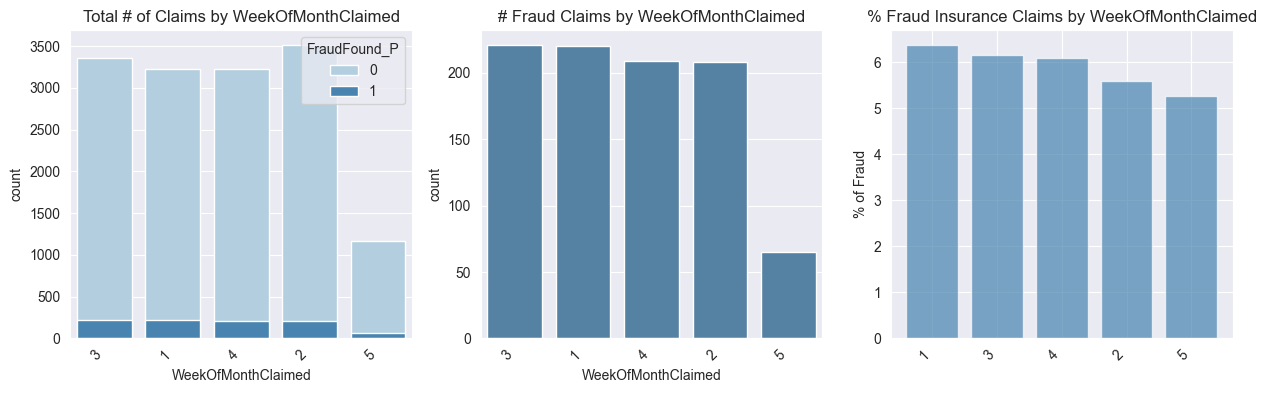

   Sex  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
  Male             1    818                 6.29                            88.62
Female             1    105                 4.34                            11.38
Female             0   2315                95.66                              NaN
  Male             0  12182                93.71                              NaN


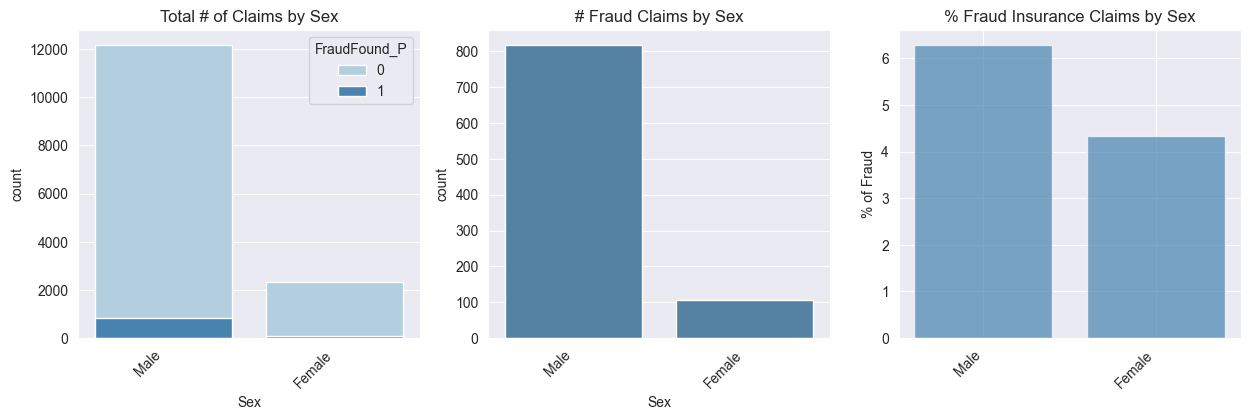

MaritalStatus  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
        Widow             1      3                 8.57                             0.33
      Married             1    639                 6.01                            69.23
       Single             1    278                 5.94                            30.12
     Divorced             1      3                 3.95                             0.33
     Divorced             0     73                96.05                              NaN
       Single             0   4406                94.06                              NaN
      Married             0   9986                93.99                              NaN
        Widow             0     32                91.43                              NaN


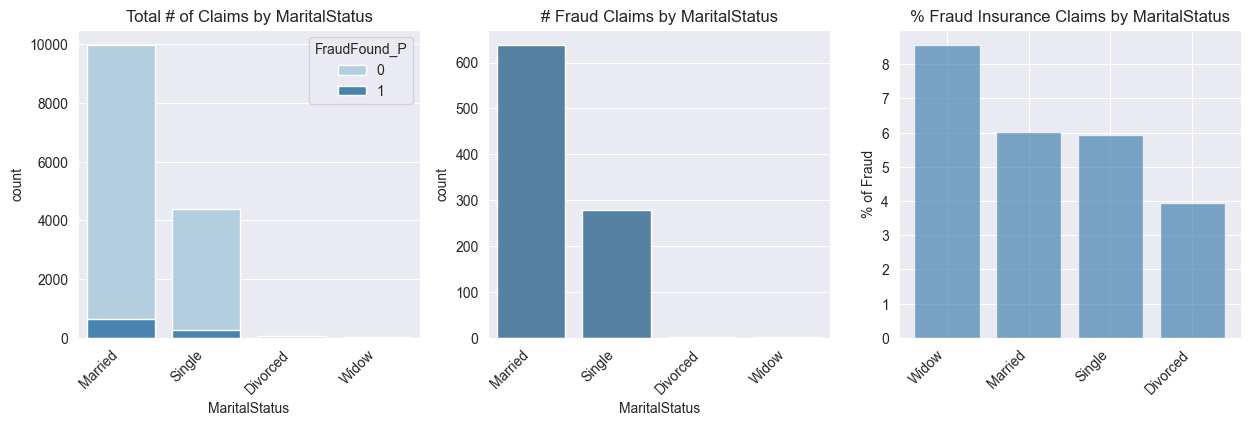

        Fault  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
Policy Holder             1    886                 7.89                            95.99
  Third Party             1     37                 0.88                             4.01
  Third Party             0   4153                99.12                              NaN
Policy Holder             0  10344                92.11                              NaN


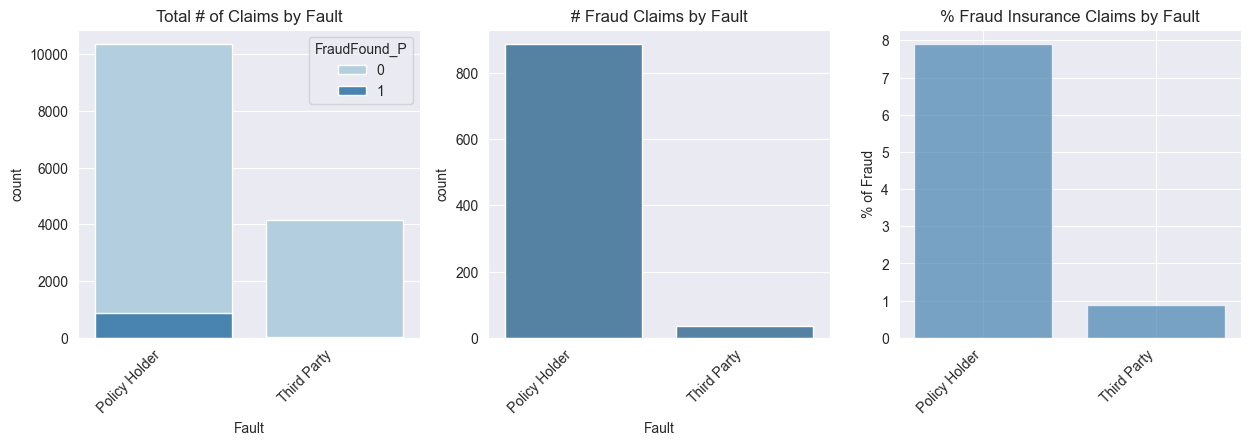

          PolicyType  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
   Sport - Collision             1     48                13.79                             5.20
Utility - All Perils             1     41                12.06                             4.44
  Sedan - All Perils             1    411                10.06                            44.53
 Utility - Collision             1      3                10.00                             0.33
   Sedan - Collision             1    384                 6.88                            41.60
   Sedan - Liability             1     36                 0.72                             3.90
  Sport - All Perils             0     22               100.00                              NaN
   Sport - Liability             0      1               100.00                              NaN
 Utility - Liability             0     21               100.00                              NaN
   Sedan - Liability             0   495

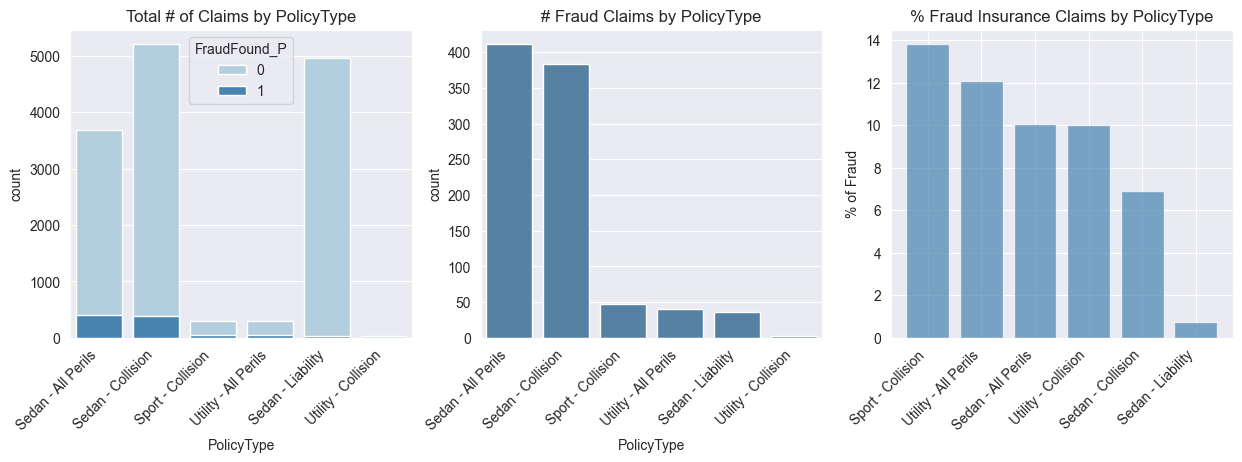

VehicleCategory  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
        Utility             1     44                11.25                             4.77
          Sedan             1    795                 8.22                            86.13
          Sport             1     84                 1.57                             9.10
          Sport             0   5274                98.43                              NaN
          Sedan             0   8876                91.78                              NaN
        Utility             0    347                88.75                              NaN


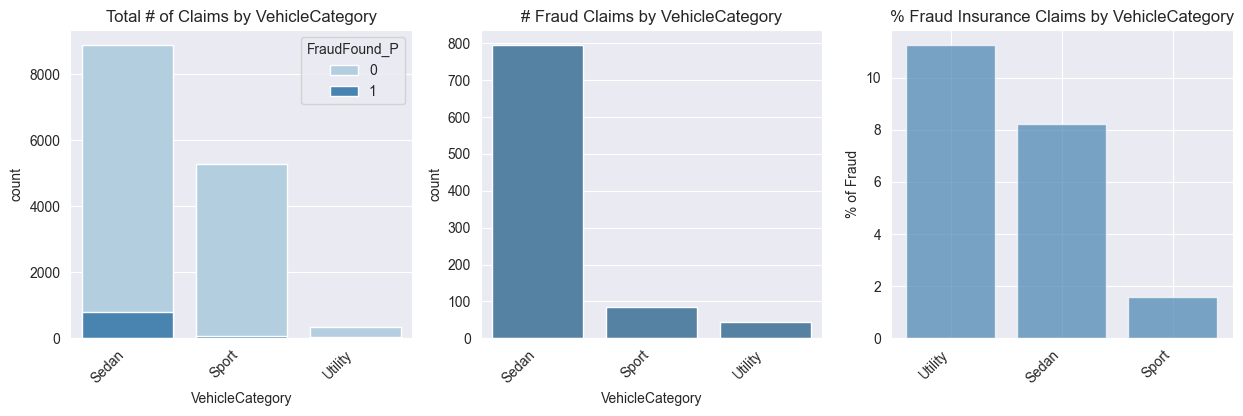

   VehiclePrice  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
less than 20000             1    103                 9.40                            11.16
more than 69000             1    189                 8.73                            20.48
 40000 to 59000             1     31                 6.72                             3.36
 20000 to 29000             1    421                 5.21                            45.61
 30000 to 39000             1    175                 4.95                            18.96
 60000 to 69000             1      4                 4.60                             0.43
 60000 to 69000             0     83                95.40                              NaN
 30000 to 39000             0   3358                95.05                              NaN
 20000 to 29000             0   7658                94.79                              NaN
 40000 to 59000             0    430                93.28                              NaN

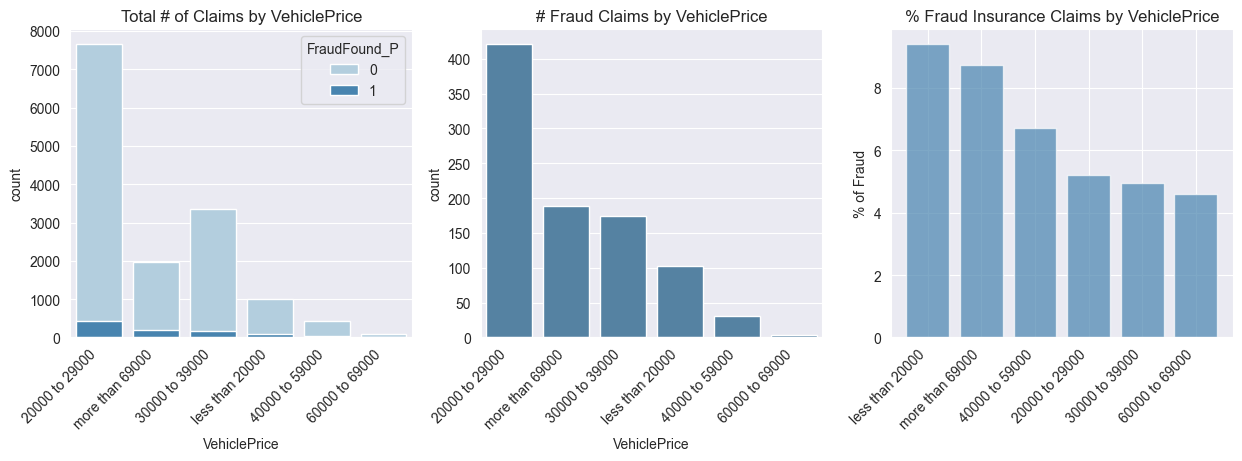

RepNumber  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
        6             1     66                 7.01                             7.15
        7             1     74                 6.92                             8.02
       10             1     66                 6.69                             7.15
        9             1     65                 6.51                             7.04
       13             1     58                 6.50                             6.28
        1             1     63                 6.38                             6.83
        3             1     60                 6.32                             6.50
       14             1     57                 6.06                             6.18
       11             1     56                 5.91                             6.07
        2             1     55                 5.75                             5.96
        8             1     52                 5.59              

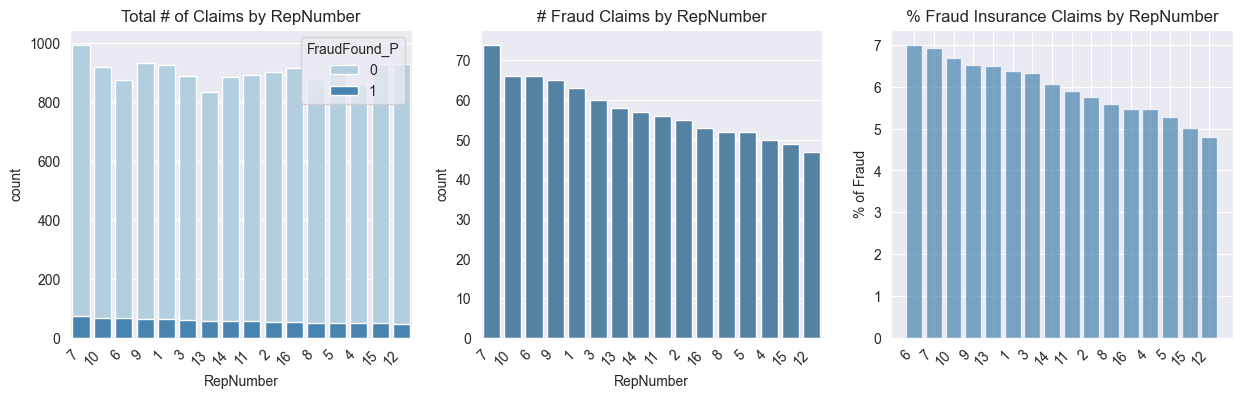

Deductible  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
       300             1      2                25.00                             0.22
       500             1     47                17.87                             5.09
       700             1     18                 5.79                             1.95
       400             1    856                 5.77                            92.74
       400             0  13982                94.23                              NaN
       700             0    293                94.21                              NaN
       500             0    216                82.13                              NaN
       300             0      6                75.00                              NaN


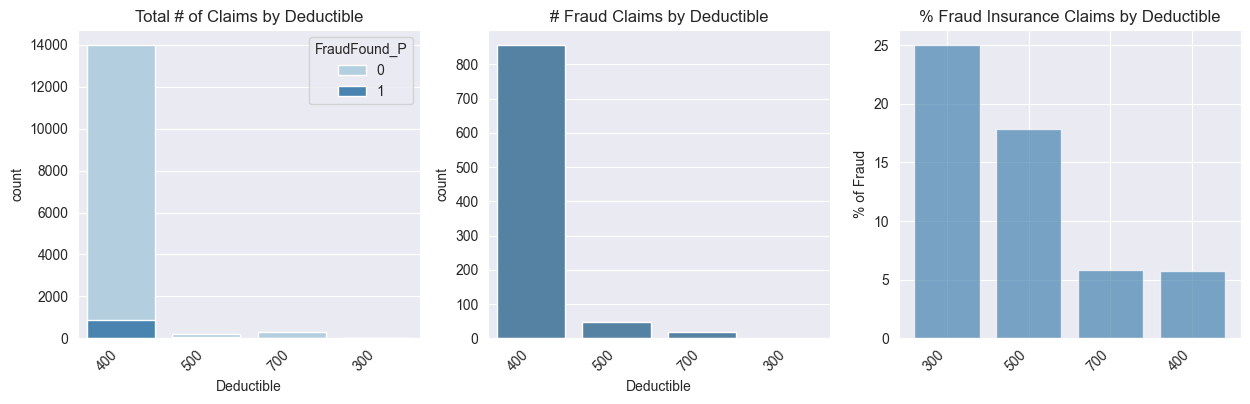

DriverRating  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
           3             1    242                 6.23                            26.22
           4             1    235                 6.20                            25.46
           1             1    232                 5.88                            25.14
           2             1    214                 5.63                            23.19
           2             0   3587                94.37                              NaN
           1             0   3712                94.12                              NaN
           4             0   3556                93.80                              NaN
           3             0   3642                93.77                              NaN


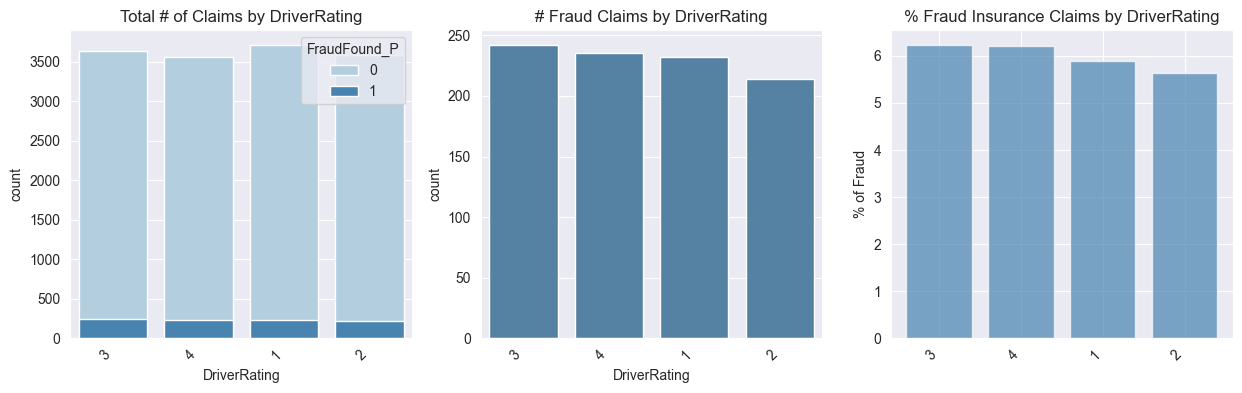

Days_Policy_Accident  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
                none             1      9                16.36                             0.98
             8 to 15             1      5                 9.09                             0.54
              1 to 7             1      1                 7.14                             0.11
            15 to 30             1      3                 6.12                             0.33
        more than 30             1    905                 5.94                            98.05
        more than 30             0  14342                94.06                              NaN
            15 to 30             0     46                93.88                              NaN
              1 to 7             0     13                92.86                              NaN
             8 to 15             0     50                90.91                              NaN
                none             0     4

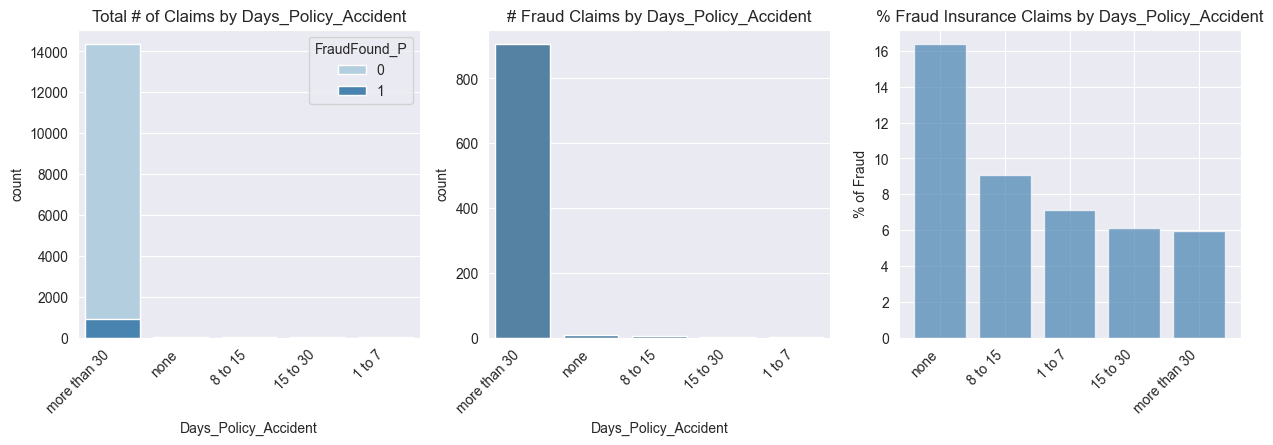

Days_Policy_Claim  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
          8 to 15             1      3                14.29                             0.33
         15 to 30             1      6                10.71                             0.65
     more than 30             1    914                 5.96                            99.02
             none             0      1               100.00                              NaN
     more than 30             0  14428                94.04                              NaN
         15 to 30             0     50                89.29                              NaN
          8 to 15             0     18                85.71                              NaN


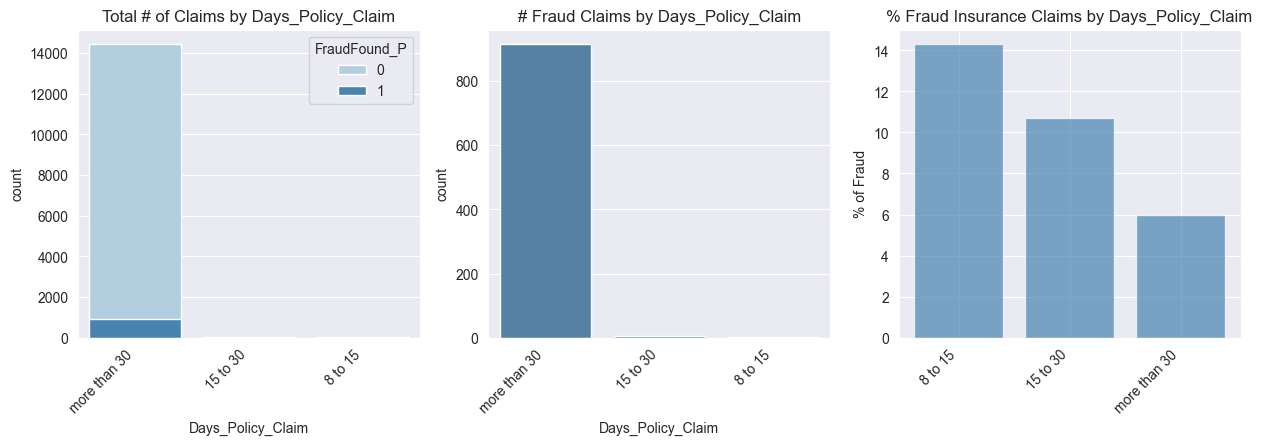

PastNumberOfClaims  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
              none             1    339                 7.79                            36.73
                 1             1    222                 6.21                            24.05
            2 to 4             1    294                 5.36                            31.85
       more than 4             1     68                 3.38                             7.37
       more than 4             0   1942                96.62                              NaN
            2 to 4             0   5191                94.64                              NaN
                 1             0   3351                93.79                              NaN
              none             0   4013                92.21                              NaN


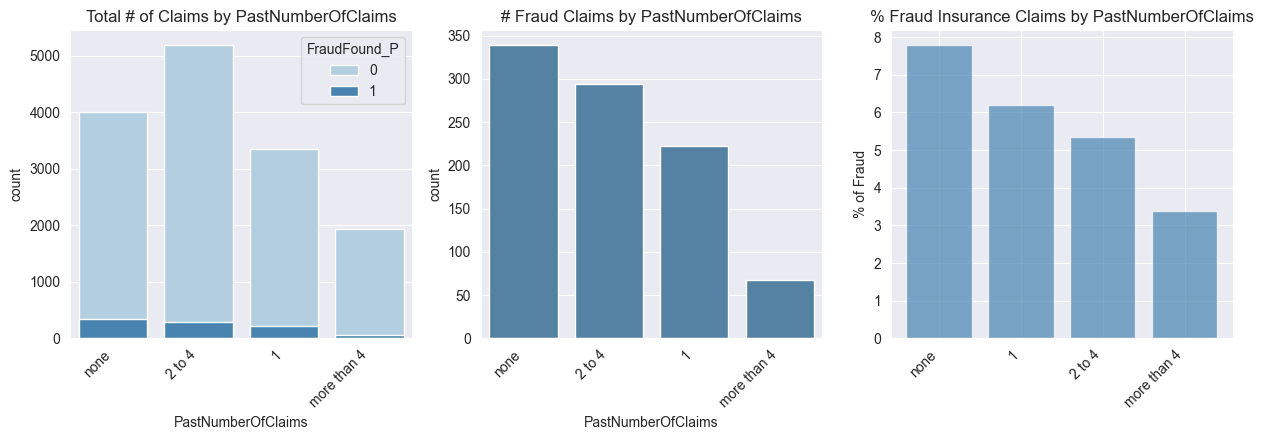

AgeOfVehicle  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
     4 years             1     21                 9.17                             2.28
         new             1     32                 8.58                             3.47
     3 years             1     13                 8.55                             1.41
     5 years             1     95                 7.00                            10.29
     6 years             1    228                 6.61                            24.70
     7 years             1    325                 5.60                            35.21
 more than 7             1    206                 5.17                            22.32
     2 years             1      3                 4.11                             0.33
     2 years             0     70                95.89                              NaN
 more than 7             0   3775                94.83                              NaN
     7 years             0   548

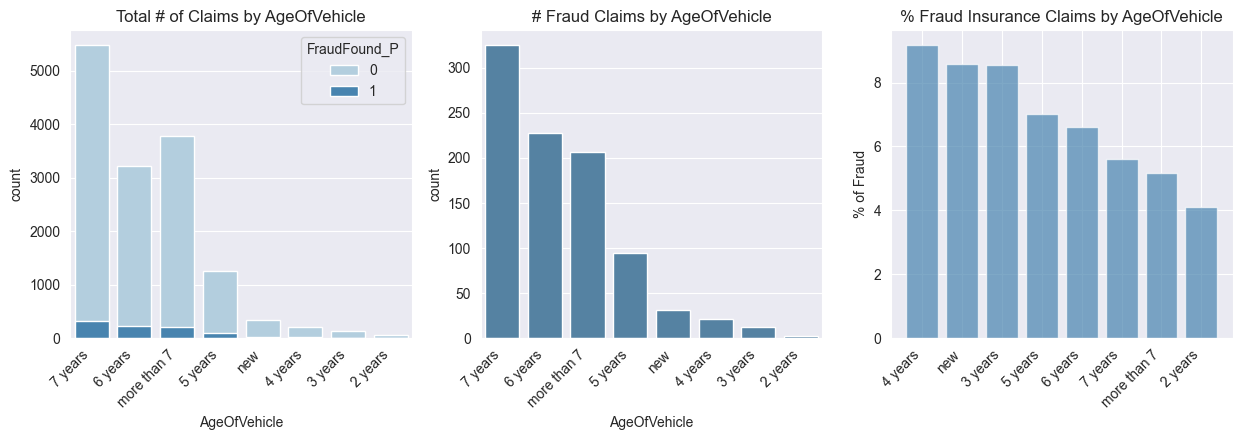

AgeOfPolicyHolder  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
         21 to 25             1     16                14.81                             1.73
         18 to 20             1      2                13.33                             0.22
         16 to 17             1     31                 9.69                             3.36
         31 to 35             1    360                 6.44                            39.00
          over 65             1     30                 5.91                             3.25
         36 to 40             1    237                 5.86                            25.68
         26 to 30             1     33                 5.38                             3.58
         41 to 50             1    144                 5.09                            15.60
         51 to 65             1     70                 5.03                             7.58
         51 to 65             0   1322                94.97           

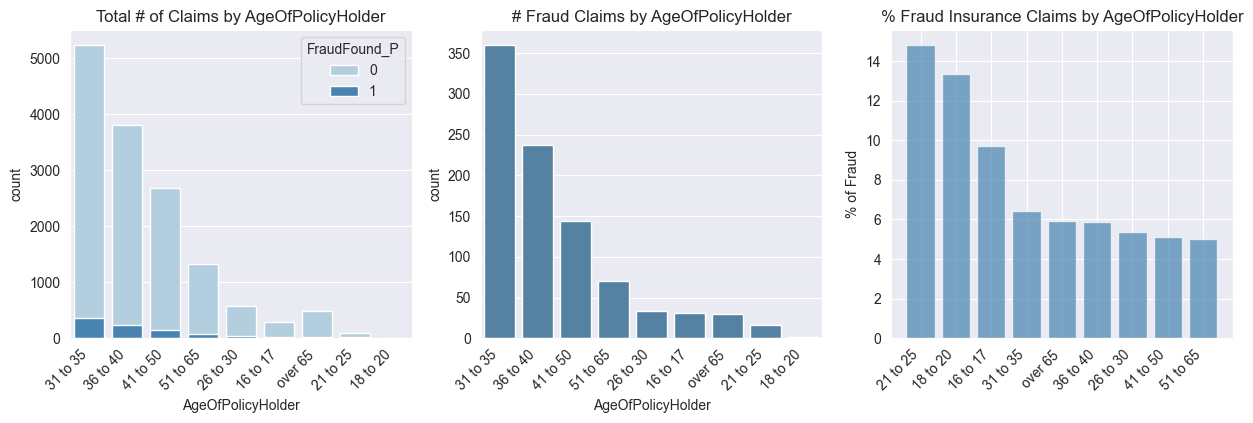

PoliceReportFiled  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
               No             1    907                 6.05                            98.27
              Yes             1     16                 3.74                             1.73
              Yes             0    412                96.26                              NaN
               No             0  14085                93.95                              NaN


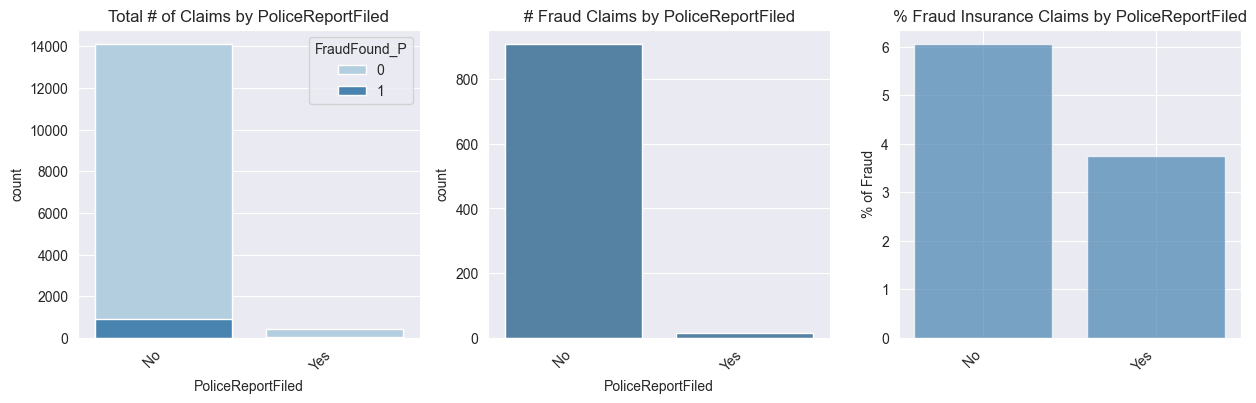

WitnessPresent  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
            No             1    920                 6.00                            99.67
           Yes             1      3                 3.45                             0.33
           Yes             0     84                96.55                              NaN
            No             0  14413                94.00                              NaN


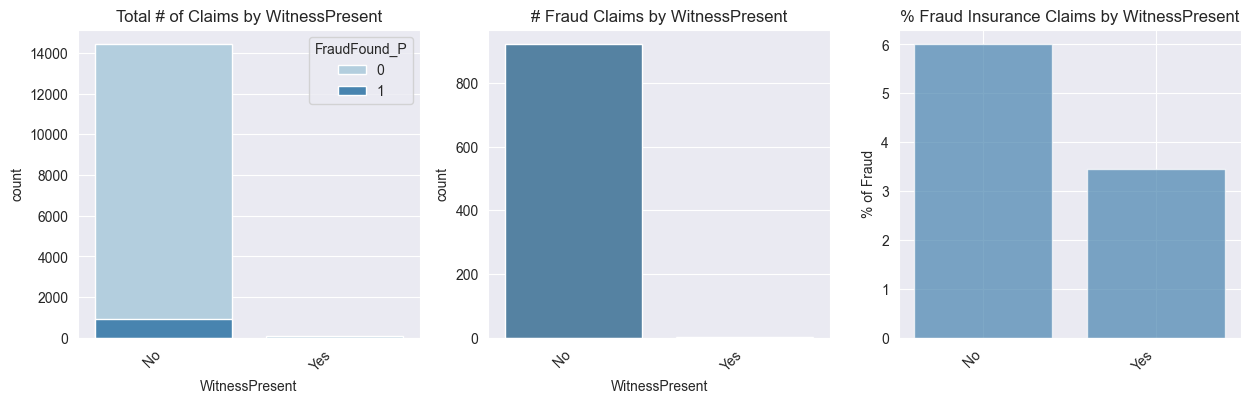

AgentType  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
 External             1    919                 6.05                            99.57
 Internal             1      4                 1.66                             0.43
 Internal             0    237                98.34                              NaN
 External             0  14260                93.95                              NaN


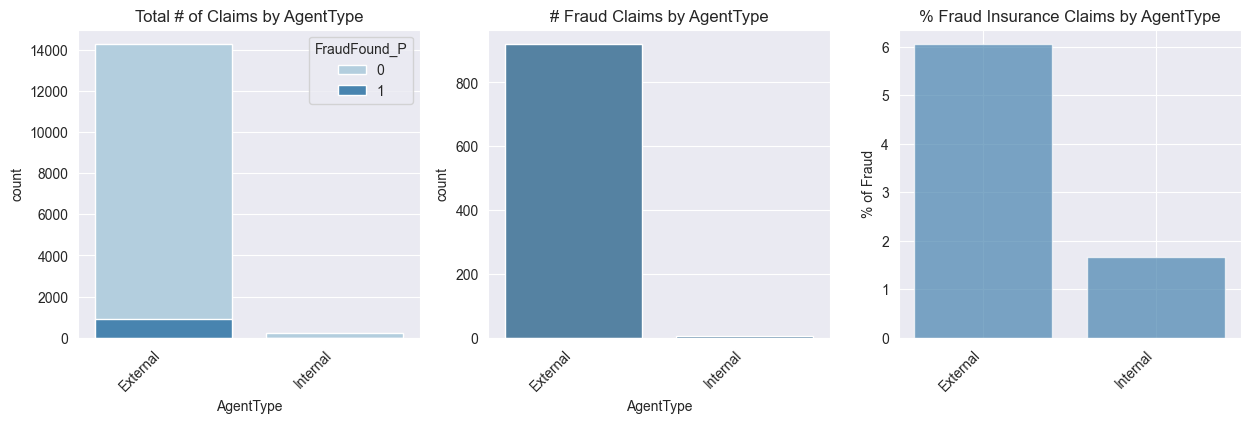

NumberOfSuppliments  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
               none             1    472                 6.70                            51.14
             1 to 2             1    159                 6.39                            17.23
        more than 5             1    195                 5.04                            21.13
             3 to 5             1     97                 4.81                            10.51
             3 to 5             0   1920                95.19                              NaN
        more than 5             0   3672                94.96                              NaN
             1 to 2             0   2330                93.61                              NaN
               none             0   6575                93.30                              NaN


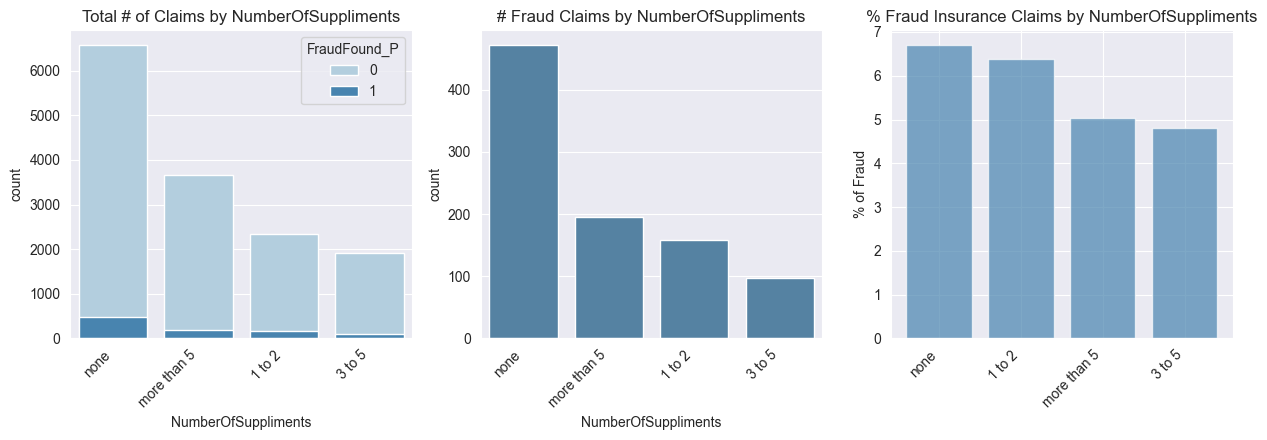

AddressChange_Claim  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
     under 6 months             1      3                75.00                             0.33
       2 to 3 years             1     51                17.53                             5.53
             1 year             1     11                 6.47                             1.19
          no change             1    825                 5.76                            89.38
       4 to 8 years             1     33                 5.23                             3.58
       4 to 8 years             0    598                94.77                              NaN
          no change             0  13499                94.24                              NaN
             1 year             0    159                93.53                              NaN
       2 to 3 years             0    240                82.47                              NaN
     under 6 months             0      1          

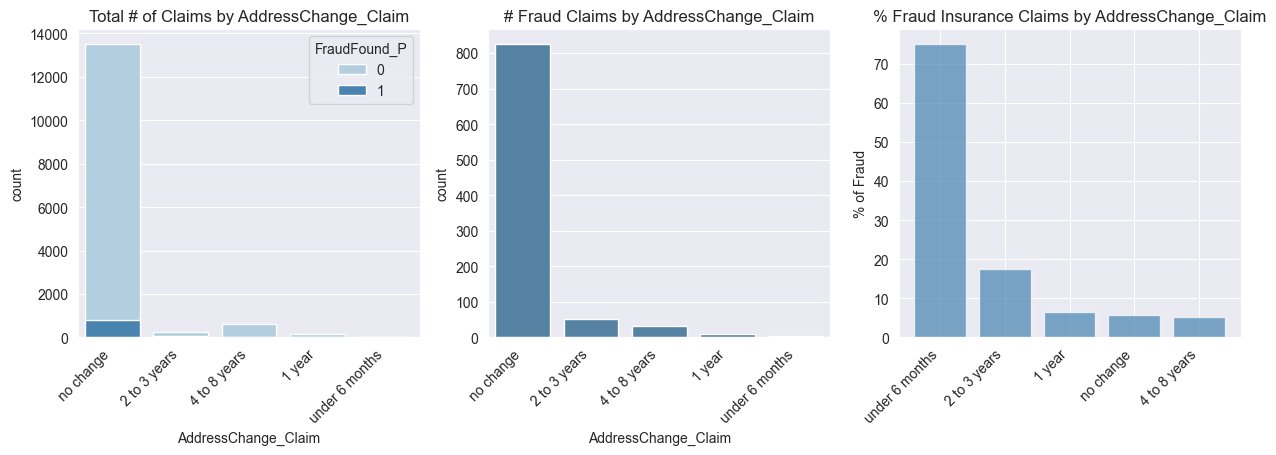

NumberOfCars  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
      3 to 4             1     29                 7.80                             3.14
  2 vehicles             1     43                 6.06                             4.66
   1 vehicle             1    850                 5.94                            92.09
      5 to 8             1      1                 4.76                             0.11
 more than 8             0      2               100.00                              NaN
      5 to 8             0     20                95.24                              NaN
   1 vehicle             0  13466                94.06                              NaN
  2 vehicles             0    666                93.94                              NaN
      3 to 4             0    343                92.20                              NaN


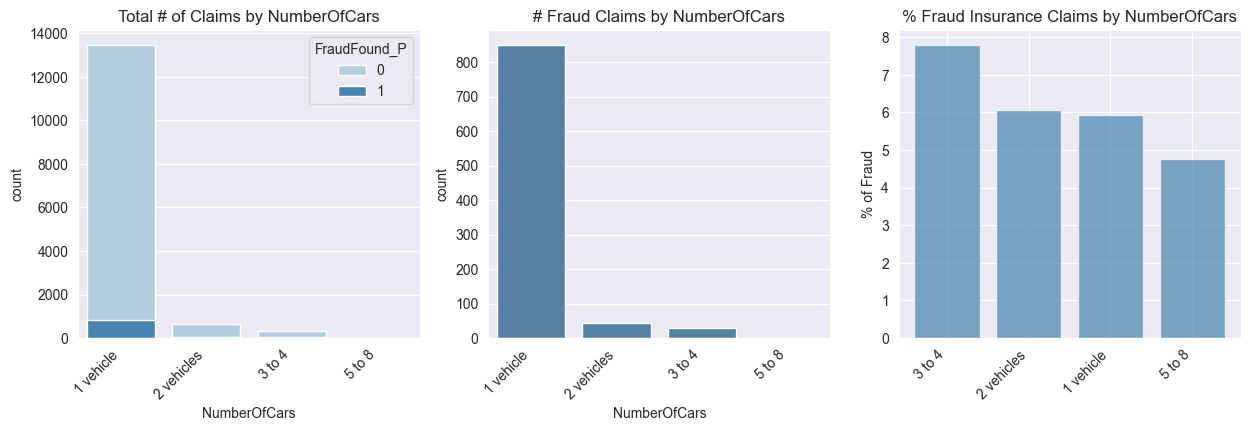

Year  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
1994             1    409                 6.66                            44.31
1995             1    301                 5.79                            32.61
1996             1    213                 5.22                            23.08
1996             0   3870                94.78                              NaN
1995             0   4894                94.21                              NaN
1994             0   5733                93.34                              NaN


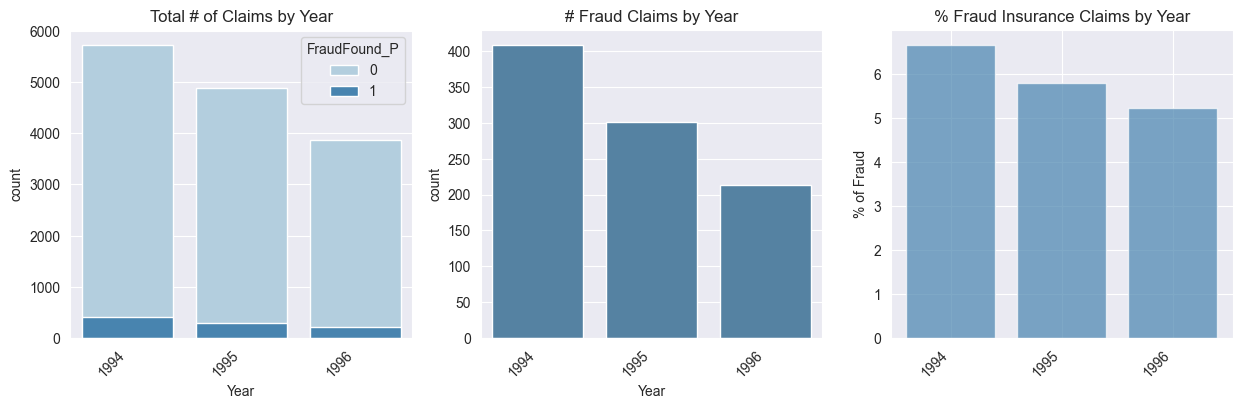

BasePolicy  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
All Perils             1    452                10.16                            48.97
 Collision             1    435                 7.30                            47.13
 Liability             1     36                 0.72                             3.90
 Liability             0   4973                99.28                              NaN
 Collision             0   5527                92.70                              NaN
All Perils             0   3997                89.84                              NaN


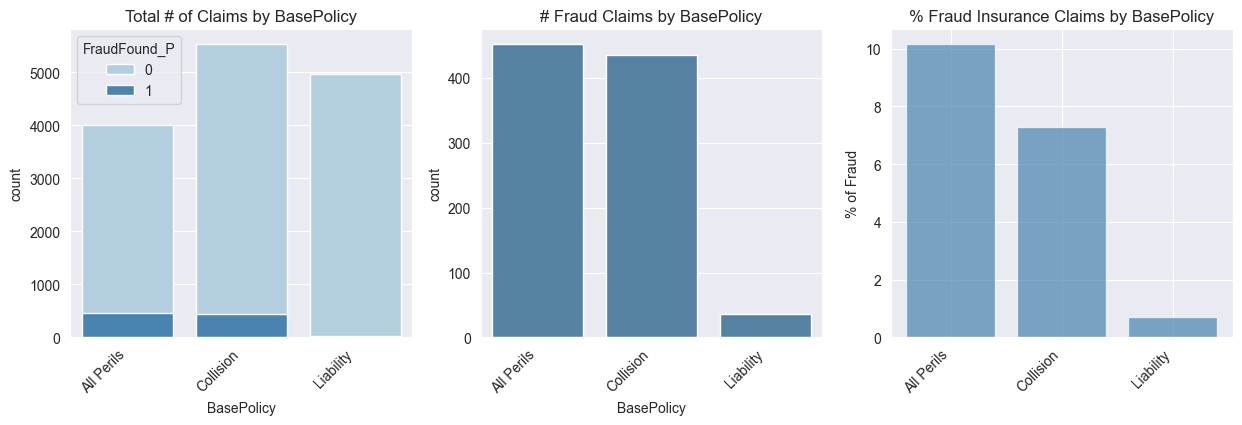

Age_Bracket  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
   18 to 20             1     16                14.81                             1.73
   16 to 17             1      2                13.33                             0.22
   31 to 35             1    190                 6.76                            20.59
   36 to 40             1    158                 6.76                            17.12
   26 to 30             1    170                 6.11                            18.42
    over 65             1     30                 5.91                             3.25
   21 to 25             1     33                 5.38                             3.58
   41 to 50             1    186                 5.35                            20.15
   51 to 65             1    138                 4.98                            14.95
   51 to 65             0   2632                95.02                              NaN
   41 to 50             0   3289           

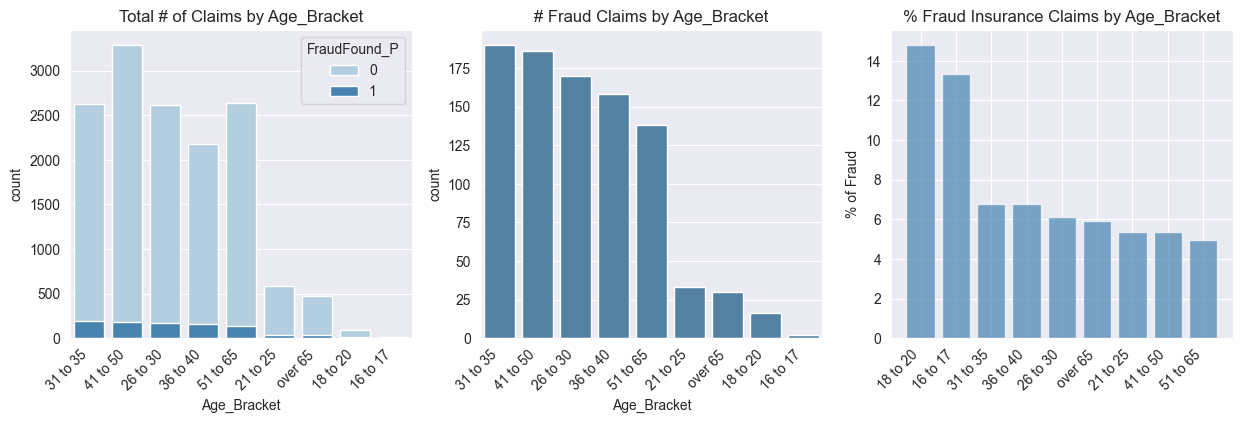

VehicleCategory_BasePolicy  FraudFound_P  Count  Percentage of Fraud  Percentage of Total Fraud Cases
         Sport - Collision             1     48                13.79                             5.20
      Utility - All Perils             1     41                12.06                             4.44
        Sedan - All Perils             1    411                10.06                            44.53
       Utility - Collision             1      3                10.00                             0.33
         Sedan - Collision             1    384                 6.88                            41.60
         Sport - Liability             1     36                 0.72                             3.90
        Sport - All Perils             0     22               100.00                              NaN
       Utility - Liability             0     21               100.00                              NaN
         Sport - Liability             0   4952                99.28              

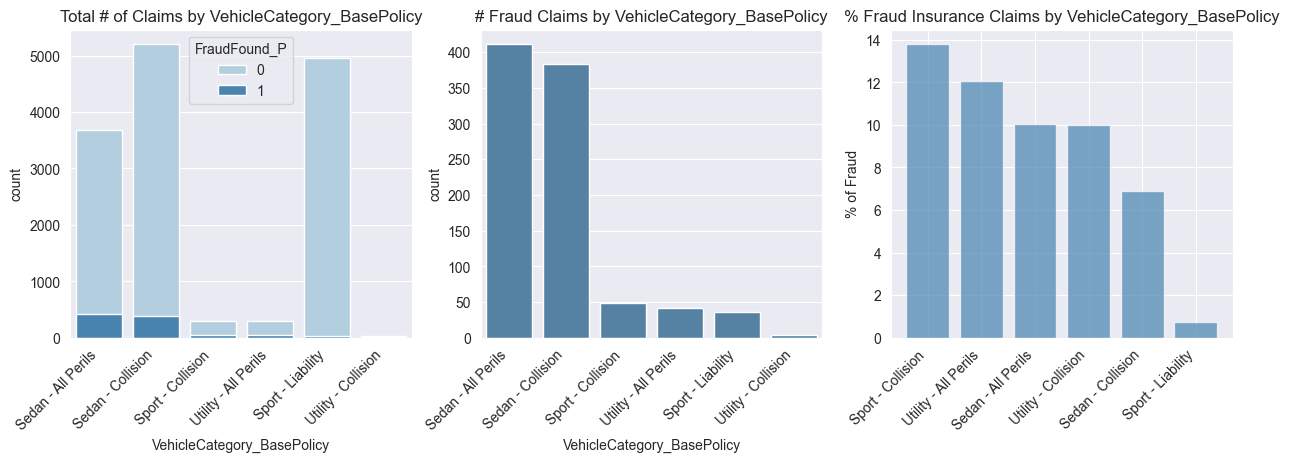

In [24]:
import matplotlib.pyplot as plt

for col in df_fraud.columns:
    if (col != 'FraudFound_P' and col !='Age'):
        sns.set_style('darkgrid')

        # Create a DataFrame for count and percentage of fraud cases
        fraud_cases = pd.DataFrame(df_fraud.groupby([col, 'FraudFound_P']).size(), columns=['Count']).reset_index()
        total_counts = fraud_cases.groupby(col)['Count'].transform('sum')
        fraud_cases['Percentage of Fraud'] = round(fraud_cases['Count'] / total_counts * 100, 2)

        if (fraud_cases['FraudFound_P'] == 1).any():
            total_fraud_cases = fraud_cases[fraud_cases['FraudFound_P'] == 1]['Count'].sum()
            fraud_cases.loc[fraud_cases['FraudFound_P'] == 1, 'Percentage of Total Fraud Cases'] = round(fraud_cases['Count'] / total_fraud_cases * 100, 2)

        fraud_cases = fraud_cases.sort_values(by=['FraudFound_P', 'Percentage of Fraud', col], ascending=[False, False, True])

        # Print the fraud_cases DataFrame
        print(fraud_cases.to_string(index=False))

        # Plot three graphs:
        fig, axes = plt.subplots(1, 3, figsize=(15, 4))

        # Plot 1: the count of FraudFound_P (both 0 and 1) for each category of a given variable
        plt.subplot(1, 3, 1)
        order = df_fraud[df_fraud['FraudFound_P'] == 1][col].value_counts().index
        ax = sns.countplot(data=df_fraud, x=col, hue='FraudFound_P', palette='Blues',\
                           dodge=False, order=order)
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        plt.title(f'Total # of Claims by {col}')

        # Plot 2: the count of FraudFound_P == 1 for each category of a given variable
        plt.subplot(1, 3, 2)
        ax = sns.countplot(data=df_fraud[df_fraud['FraudFound_P'] == 1], x=col, color='#4884af', \
                           dodge=False, order=order)
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        plt.title(f'# Fraud Claims by {col}')

        # Plot 3: the  % of FraudFound_P == 1 for each category of a given variable
        plt.subplot(1, 3, 3)
        fraud_cases_subset = fraud_cases[fraud_cases['FraudFound_P'] == 1]
        fraud_cases_subset = fraud_cases_subset.sort_values(by='Percentage of Fraud', ascending=False)  # Sort by Percentage of Fraud
        plt.bar(x=fraud_cases_subset[col], height=fraud_cases_subset['Percentage of Fraud'], color='#4884af', label='Percentage of Fraud', alpha=0.7)
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('% of Fraud')
        plt.title(f'% Fraud Insurance Claims by {col}')

        plt.show()


In [25]:
# we observed that DaysOfWeekClaimed and MonthClaimed both included 0 values
df_fraud[(df_fraud['DayOfWeekClaimed'] == '0') | (df_fraud['MonthClaimed'] == '0')]['FraudFound_P']

1516    0
Name: FraudFound_P, dtype: int64

In [26]:
df_fraud[df_fraud['DayOfWeekClaimed'] == '0']

Month WeekOfMonth DayOfWeek   Make AccidentArea DayOfWeekClaimed  \
1516   Jul           2    Monday  Honda        Rural                0   

     MonthClaimed WeekOfMonthClaimed   Sex MaritalStatus  ...  \
1516            0                  1  Male        Single  ...   

      PoliceReportFiled WitnessPresent AgentType NumberOfSuppliments  \
1516                 No             No  External                none   

     AddressChange_Claim  NumberOfCars  Year  BasePolicy Age_Bracket  \
1516           no change     1 vehicle  1994  All Perils    36 to 40   

     VehicleCategory_BasePolicy  
1516         Sedan - All Perils  

[1 rows x 34 columns]

In [27]:
# lets remove rows where  DayOfWeekClaimed or MonthClaimed is equal to 0 (and FraudFound_P == 0)

df_fraud = df_fraud[~((df_fraud['FraudFound_P'] == 0) & ((df_fraud['DayOfWeekClaimed'] == '0') | (df_fraud['MonthClaimed'] == '0')))]


In [28]:
# Confirming we removed the row (rows) where  DayOfWeekClaimed or MonthClaimed is equal to 0 (and FraudFound_P == 0)
df_fraud[(df_fraud['DayOfWeekClaimed'] == '0') | (df_fraud['MonthClaimed'] == '0')]['FraudFound_P']

Series([], Name: FraudFound_P, dtype: int64)

In [29]:
# chi-square as a part of EDA

from scipy.stats import chi2_contingency

# Create an empty list to store the results
chi2_results_list = []

for col in df_fraud.columns:
    if col != 'FraudFound_P':
        # Create a contingency table
        contingency_table = pd.crosstab(df_fraud[col], df_fraud['FraudFound_P'])

        # Perform the chi-square test
        chi2, p, _, _ = chi2_contingency(contingency_table)

        # Determine significance
        significance = '*' if p < 0.05 else ''

        # Append the results to the list
        chi2_results_list.append({'Variable': col, 'Chi2': chi2, 'P-value': p, 'Significance': significance})

# Create a DataFrame from the list of results
chi2_results = pd.DataFrame(chi2_results_list)

# Sort the DataFrame by Chi2 values in descending order
chi2_results_sorted = chi2_results.sort_values(by=['Chi2'], ascending=False)

print(chi2_results_sorted)



                      Variable        Chi2       P-value Significance
12                  PolicyType  437.491381  1.768441e-89            *
32  VehicleCategory_BasePolicy  437.490455  2.154735e-90            *
30                  BasePolicy  402.947238  3.170436e-88            *
13             VehicleCategory  290.980893  6.520817e-64            *
11                       Fault  264.984556  1.406180e-59            *
10                         Age  106.144451  7.331495e-04            *
27         AddressChange_Claim  104.722693  9.704718e-22            *
16                  Deductible   72.406255  1.302831e-15            *
14                VehiclePrice   67.836116  2.888324e-13            *
3                         Make   59.815292  2.191573e-06            *
20          PastNumberOfClaims   53.541755  1.405198e-11            *
6                 MonthClaimed   42.200514  1.495245e-05            *
22           AgeOfPolicyHolder   33.104861  5.896560e-05            *
31                 A

In [30]:
# Another way to identify which variables have a significant impact on the target variable (FraudFound_P) - ANOVA
from scipy import stats

categorical_features = df_fraud.select_dtypes(include=['object']).columns
anova_results = {}

for feature in categorical_features:
    grouped = df_fraud.groupby(feature)['FraudFound_P']
    f_value, p_value = stats.f_oneway(*(group for name, group in grouped))
    anova_results[feature] = {'F-Value': f_value, 'p-Value': p_value}

# Converting results to a DataFrame for better visualization
anova_df = pd.DataFrame(anova_results).T
anova_df['p-Value'] = anova_df['p-Value'].round(5)

# Add significance column
anova_df['Significance'] = np.where(anova_df['p-Value'] < 0.05, '*', '')


# Sort results by F-value and p-value significance level
anova_df = anova_df.sort_values(by=['F-Value', 'Significance'], ascending=[False, True])

print(anova_df)

                               F-Value  p-Value Significance
Fault                       270.870598  0.00000            *
BasePolicy                  206.839798  0.00000            *
VehicleCategory             148.260040  0.00000            *
VehicleCategory_BasePolicy   64.290350  0.00000            *
PolicyType                   56.250528  0.00000            *
AddressChange_Claim          26.351155  0.00000            *
Deductible                   24.243000  0.00000            *
PastNumberOfClaims           17.904795  0.00000            *
AccidentArea                 17.380305  0.00003            *
Sex                          13.851336  0.00020            *
VehiclePrice                 13.621873  0.00000            *
AgentType                     8.145948  0.00432            *
NumberOfSuppliments           6.057405  0.00041            *
Year                          4.798345  0.00826            *
AgeOfPolicyHolder             4.144591  0.00006            *
PoliceReportFiled       

In [31]:
df_fraud.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'RepNumber', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'Age_Bracket', 'VehicleCategory_BasePolicy'],
      dtype='object')

In [32]:
df_fraud_backup = df_fraud.copy()


In [33]:
df_fraud_for_modeling = df_fraud.drop(['Age'], axis=1)


In [34]:
df_fraud_for_modeling.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'RepNumber', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'Age_Bracket', 'VehicleCategory_BasePolicy'],
      dtype='object')

In [35]:
df_fraud_for_modeling.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15419 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Month                       15419 non-null  object
 1   WeekOfMonth                 15419 non-null  object
 2   DayOfWeek                   15419 non-null  object
 3   Make                        15419 non-null  object
 4   AccidentArea                15419 non-null  object
 5   DayOfWeekClaimed            15419 non-null  object
 6   MonthClaimed                15419 non-null  object
 7   WeekOfMonthClaimed          15419 non-null  object
 8   Sex                         15419 non-null  object
 9   MaritalStatus               15419 non-null  object
 10  Fault                       15419 non-null  object
 11  PolicyType                  15419 non-null  object
 12  VehicleCategory             15419 non-null  object
 13  VehiclePrice                15419 non-null  object


In [36]:
def column_to_dummy_vars(dataframe, column_name):
    dummies = pd.get_dummies(dataframe[column_name], prefix=f"{column_name} = ")
    dataframe = pd.concat([dataframe, dummies], axis=1)
    dataframe = dataframe.drop([column_name], axis=1)
    return dataframe

In [37]:
#apply the function to above to all columns that have cateogorical data
for col in df_fraud_for_modeling:
     if df_fraud_for_modeling[col].dtype == 'object':

        df_fraud_for_modeling = column_to_dummy_vars(df_fraud_for_modeling, col)

In [38]:
pd.DataFrame(df_fraud_for_modeling['FraudFound_P'].value_counts())


count
FraudFound_P       
0             14496
1               923

In [39]:
df_fraud_for_modeling.columns

Index(['FraudFound_P', 'Month = _Apr', 'Month = _Aug', 'Month = _Dec',
       'Month = _Feb', 'Month = _Jan', 'Month = _Jul', 'Month = _Jun',
       'Month = _Mar', 'Month = _May',
       ...
       'Age_Bracket = _51 to 65', 'Age_Bracket = _over 65',
       'VehicleCategory_BasePolicy = _Sedan - All Perils',
       'VehicleCategory_BasePolicy = _Sedan - Collision',
       'VehicleCategory_BasePolicy = _Sport - All Perils',
       'VehicleCategory_BasePolicy = _Sport - Collision',
       'VehicleCategory_BasePolicy = _Sport - Liability',
       'VehicleCategory_BasePolicy = _Utility - All Perils',
       'VehicleCategory_BasePolicy = _Utility - Collision',
       'VehicleCategory_BasePolicy = _Utility - Liability'],
      dtype='object', length=192)

In [40]:
# splitting the dataset
from sklearn.model_selection import train_test_split

# Separating features and target variable
X = df_fraud_for_modeling.drop('FraudFound_P', axis=1)
y = df_fraud_for_modeling['FraudFound_P']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [41]:
# Logistic regression - baseline, without SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the balanced dataset
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lg = logreg_model.predict(X_test)

# Evaluate the performance of the model
conf_matrix = confusion_matrix(y_test, y_pred_lg)
classification_rep = classification_report(y_test, y_pred_lg)

# Print the results
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Confusion Matrix:
 [[2889   10]
 [ 182    3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.23      0.02      0.03       185

    accuracy                           0.94      3084
   macro avg       0.59      0.51      0.50      3084
weighted avg       0.90      0.94      0.91      3084



In [42]:
# Decision Tree without SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the SMOTE dataset
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the performance of the model
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Print the results
print("\nDecision Tree Confusion Matrix:\n", conf_matrix_dt)
print("\nDecision Tree Classification Report:\n", classification_rep_dt)


Decision Tree Confusion Matrix:
 [[2714  185]
 [ 144   41]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      2899
           1       0.18      0.22      0.20       185

    accuracy                           0.89      3084
   macro avg       0.57      0.58      0.57      3084
weighted avg       0.90      0.89      0.90      3084



In [43]:
# Random Forest without SMOTE

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the balanced dataset
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the performance of the model
# accuracy_rf = accuracy_score(y_test_balanced, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print the results
print("\nRandom Forest Confusion Matrix:\n", conf_matrix_rf)
print("\nRandom Forest Classification Report:\n", classification_rep_rf)
print(f'Size of the x-train, y-train, x-test, y-test: {len(X_train), len(y_train), len(X_test), len(y_test)}')


Random Forest Confusion Matrix:
 [[2899    0]
 [ 182    3]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       1.00      0.02      0.03       185

    accuracy                           0.94      3084
   macro avg       0.97      0.51      0.50      3084
weighted avg       0.94      0.94      0.91      3084

Size of the x-train, y-train, x-test, y-test: (12335, 12335, 3084, 3084)


In [44]:
# XGBoost without SMOTE:
import xgboost as xgb

# Create an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model on the training set
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the performance of the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)



Confusion Matrix:
 [[2877   22]
 [ 169   16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      2899
           1       0.42      0.09      0.14       185

    accuracy                           0.94      3084
   macro avg       0.68      0.54      0.56      3084
weighted avg       0.91      0.94      0.92      3084



[[True Negative (TN)   False Positive (FP)] <br/>
 [False Negative (FN)  True Positive (TP)]]

In [45]:
X_train = X_train.astype('uint8')
Y_train = y_train.astype('uint8')

In [46]:
# Applying SMOTE to oversample the minority class cases:

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [47]:
X_train.dtypes

Month = _Apr                                          uint8
Month = _Aug                                          uint8
Month = _Dec                                          uint8
Month = _Feb                                          uint8
Month = _Jan                                          uint8
                                                      ...  
VehicleCategory_BasePolicy = _Sport - Collision       uint8
VehicleCategory_BasePolicy = _Sport - Liability       uint8
VehicleCategory_BasePolicy = _Utility - All Perils    uint8
VehicleCategory_BasePolicy = _Utility - Collision     uint8
VehicleCategory_BasePolicy = _Utility - Liability     uint8
Length: 191, dtype: object

In [48]:
y_train_smote.value_counts()


FraudFound_P
1    11597
0    11597
Name: count, dtype: int64

In [49]:
# Logistic Regression after applying SMOTE:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the balanced dataset
logreg_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the performance of the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)



Confusion Matrix:
 [[2887   12]
 [ 182    3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.20      0.02      0.03       185

    accuracy                           0.94      3084
   macro avg       0.57      0.51      0.50      3084
weighted avg       0.90      0.94      0.91      3084



In [50]:
# Decision Tree after SMOTE:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the SMOTE dataset
dt_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the performance of the model
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Print the results
print("\nDecision Tree Confusion Matrix:\n", conf_matrix_dt)
print("\nDecision Tree Classification Report:\n", classification_rep_dt)



Decision Tree Confusion Matrix:
 [[2704  195]
 [ 156   29]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      2899
           1       0.13      0.16      0.14       185

    accuracy                           0.89      3084
   macro avg       0.54      0.54      0.54      3084
weighted avg       0.90      0.89      0.89      3084



In [51]:
# Decision Tree after SMOTE with  hyperparameters tuning

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4],
    'class_weight': ['balanced', None]
}

# Create the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(dt_model, param_grid, scoring='f1', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_prob_dt = best_dt_model.predict_proba(X_test)[:, 1]

# Adjust the decision threshold (example: set it to 0.3)
custom_threshold = 0.3
y_pred_dt = (y_pred_prob_dt >= custom_threshold).astype(int)

# Evaluate the performance of the best Decision Tree model
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Print the results
print("\nBest Decision Tree Confusion Matrix:\n", conf_matrix_dt)
print("\nBest Decision Tree Classification Report:\n", classification_rep_dt)




Best Parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}

Best Decision Tree Confusion Matrix:
 [[2675  224]
 [ 139   46]]

Best Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      2899
           1       0.17      0.25      0.20       185

    accuracy                           0.88      3084
   macro avg       0.56      0.59      0.57      3084
weighted avg       0.90      0.88      0.89      3084



In [52]:
y_test.value_counts()

FraudFound_P
0    2899
1     185
Name: count, dtype: int64

In [53]:
# Ensemble Models (black-box)

In [54]:
# Random Trees after SMOTE using hypertuning parameters from Decision Tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Best hyperparameters obtained from the Decision Tree model
best_dt_params = {
    'class_weight': 'balanced',
    'criterion': 'gini',
    'max_depth': None,
    'min_samples_leaf': 4,
    'min_samples_split': 2
}

# Create a Random Forest model using the best hyperparameters
rf_model = RandomForestClassifier(**best_dt_params, random_state=42)

# Train the model on your data
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the performance of the Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print the results
print("\nRandom Forest Confusion Matrix:\n", conf_matrix_rf)
print("\nRandom Forest Classification Report:\n", classification_rep_rf)



Random Forest Confusion Matrix:
 [[2898    1]
 [ 181    4]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.80      0.02      0.04       185

    accuracy                           0.94      3084
   macro avg       0.87      0.51      0.51      3084
weighted avg       0.93      0.94      0.91      3084



In [55]:
# Random Forest after applying SMOTE

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the balanced dataset
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the performance of the model
# accuracy_rf = accuracy_score(y_test_balanced, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print the results
print("\nRandom Forest Confusion Matrix:\n", conf_matrix_rf)
print("\nRandom Forest Classification Report:\n", classification_rep_rf)



Random Forest Confusion Matrix:
 [[2899    0]
 [ 176    9]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       1.00      0.05      0.09       185

    accuracy                           0.94      3084
   macro avg       0.97      0.52      0.53      3084
weighted avg       0.95      0.94      0.92      3084



In [56]:
# Random Forest after applying SMOTE with hyperparameter tuning

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
   'n_estimators': [50, 100, 200],
   'max_depth': [None, 10, 20],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4]
}

# param_grid = {
#     'n_estimators': [100, 200, 300, 400],
#     'max_depth': [None, 5, 10, 15],
#     'min_samples_split': [5, 10, 20],
#     'min_samples_leaf': [2, 3, 5]
# }

# Create GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Fit the model with early stopping
grid_search.fit(X_train_smote, y_train_smote)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the performance of the model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print the results
print("\nRandom Forest Confusion Matrix:\n", conf_matrix_rf)
print("\nRandom Forest Classification Report:\n", classification_rep_rf)
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits

Random Forest Confusion Matrix:
 [[2899    0]
 [ 176    9]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       1.00      0.05      0.09       185

    accuracy                           0.94      3084
   macro avg       0.97      0.52      0.53      3084
weighted avg       0.95      0.94      0.92      3084

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [57]:
# XGBoost After SMOTE:
import xgboost as xgb

# Create an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model on the training set
xgb_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the performance of the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)



Confusion Matrix:
 [[2891    8]
 [ 179    6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.43      0.03      0.06       185

    accuracy                           0.94      3084
   macro avg       0.69      0.51      0.51      3084
weighted avg       0.91      0.94      0.91      3084



In [58]:
# XGBoost After SMOTE with hyperparameters tuning

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the test set
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)

# Evaluate the performance of the best model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}

Confusion Matrix:
 [[2899    0]
 [ 180    5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       1.00      0.03      0.05       185

    accuracy                           0.94      3084
   macro avg       0.97      0.51      0.51      3084
weighted avg       0.95      0.94      0.91      3084



In [59]:
# NN model applied after SMOTE:


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report

# added
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback

# added
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)


# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(128, input_dim=X_train_smote.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training set
#model.fit(X_train_smote, y_train_smote, epochs=10, batch_size=32, validation_split=0.2)
model.fit(X_train_smote, y_train_smote, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping_callback])
# try decreasing the batch size


# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the performance of the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)






Epoch 1/20


290/290 [==============================] - 3s 5ms/step - loss: 0.1953 - accuracy: 0.9422 - val_loss: 0.0235 - val_accuracy: 0.9905
Epoch 2/20
290/290 [==============================] - 1s 4ms/step - loss: 0.1362 - accuracy: 0.9569 - val_loss: 0.0187 - val_accuracy: 0.9916
Epoch 3/20
290/290 [==============================] - 1s 5ms/step - loss: 0.1260 - accuracy: 0.9591 - val_loss: 0.0136 - val_accuracy: 0.9940
Epoch 4/20
290/290 [==============================] - 1s 5ms/step - loss: 0.1182 - accuracy: 0.9594 - val_loss: 0.0098 - val_accuracy: 0.9953
Epoch 5/20
290/290 [==============================] - 1s 4ms/step - loss: 0.1097 - accuracy: 0.9607 - val_loss: 0.0113 - val_accuracy: 0.9950
Epoch 6/20
290/290 [==============================] - 1s 4ms/step - loss: 0.1012 - accuracy: 0.9623 - val_loss: 0.0056 - val_accuracy: 0.9968
Epoch 7/20
290/290 [==============================] - 1s 4ms/step - loss: 0.0942 - accuracy: 0.9647 - val_loss: 0.0070 - val_accuracy: 0.9966
E